Нужно решить задачу классификации типа стекол. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.


https://www.kaggle.com/datasets/uciml/glass

In [1]:
import pandas as pd

df =pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


2. Проведем первичный анализ.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
df.describe()
# in K,Mg, Ba, Fe has blowouts

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7])

Делим выборку на обучающее и тестовое подмножество.

In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
col = df.columns.tolist()
Y = df.Type
X = df[col[:-1]]
X.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=21)

4. Обучим модель дерева решений RandomForestClassifier на обучающем множестве.

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth =3, n_estimators=300, criterion = 'entropy', min_samples_split= 8, min_samples_leaf=7, random_state =47)

In [9]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


5. Для тестового множества предскажем тип стекла и сравним с истинным значением

In [10]:
init_score =[rfc.score(X_train,y_train), rfc.score(X_test, y_test)] # accuracy not very good
init_score

[0.7660818713450293, 0.6511627906976745]

In [11]:
from sklearn.metrics import classification_report

report = classification_report(y_true =y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.63      0.80      0.71        15
           2       0.62      0.62      0.62        16
           3       0.00      0.00      0.00         5
           5       0.67      0.67      0.67         3
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         3

    accuracy                           0.65        43
   macro avg       0.57      0.68      0.61        43
weighted avg       0.58      0.65      0.61        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Обработаем выбросы в данных.
а) Визуализируем распределение значений для каждой переменной.

In [12]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [13]:
import seaborn as sns

In [14]:
from sklearn.preprocessing import StandardScaler

df_sc = pd.DataFrame(StandardScaler().fit_transform(df[col[:-1]]), columns =df[col[:-1]].columns )

df_sc.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


<Axes: >

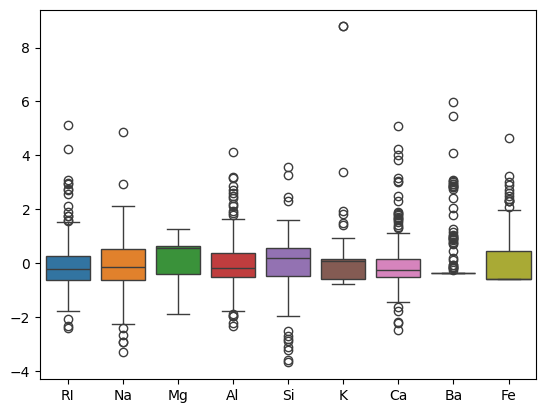

In [15]:
sns.boxplot(df_sc)
#Rl, Na, Si liiks like normal



b) Исследуйте признаки на выбросы несколькими способами.

In [16]:
# pirson normal test
import scipy

alpha = 0.05
def norm_test (df):
  for col in df.columns.tolist():
    stat, p = scipy.stats.normaltest(df[col])

    if p>alpha:
      print(f'{col} is standard. Statistics ={stat}, pvalue = {p}')
    else:
      print(f'{col} is not standart. statistics ={stat}, pvalue ={p}')
norm_test(df_sc)

RI is not standart. statistics =84.35847616243053, pvalue =4.806065113846405e-19
Na is not standart. statistics =27.015123227001755, pvalue =1.360631519391422e-06
Mg is not standart. statistics =35.8847018888436, pvalue =1.6133774867893316e-08
Al is not standart. statistics =36.77348531442793, pvalue =1.0345205542035865e-08
Si is not standart. statistics =35.87295285831358, pvalue =1.6228831908286907e-08
K is not standart. statistics =305.66553718924297, pvalue =4.222522236924822e-67
Ca is not standart. statistics =109.47261944094015, pvalue =1.6916975823728095e-24
Ba is not standart. statistics =177.27995557768077, pvalue =3.192616620971566e-39
Fe is not standart. statistics =76.86652065721245, pvalue =2.0353875688667712e-17


c) Удалим выбросы. *Посчитаем процент удаленных записей от общего числа записей для каждого класса.

In [17]:
import scipy.stats as stats
import numpy as np
df1 = df[col[:-1]]
Q1 = df1.quantile(q = 0.25)
Q3 = df1.quantile(q =0.75)
iqr = df1.apply(stats.iqr)

#df_clean = df1[~((df < (Q1-1.5*iqr)) | (df1 > (Q3 + 1.5* iqr) ))]
df_clean = df1[~((df < (Q1-1.5*iqr)))]
df_clean = df_clean[~((df_clean > (Q3+1.5*iqr)))]

df_clean['Type']= df['Type']

<ipython-input-17-33767de2b7df>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean = df1[~((df < (Q1-1.5*iqr)))]


In [18]:
df_clean.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,197.000000,207.000000,214.000000,196.000000,202.000000,207.000000,188.000000,176.0,202.000000,214.000000
mean,1.517899,13.433092,2.684533,1.385867,72.700050,0.410338,8.650532,0.0,0.041139,2.780374
std,0.001956,0.673167,1.442408,0.353192,0.551106,0.262182,0.626363,0.0,0.072806,2.103739
min,1.512990,11.560000,0.000000,0.560000,71.150000,0.000000,6.930000,0.0,0.000000,1.000000
25%,1.516510,12.935000,2.115000,1.190000,72.345000,0.120000,8.227500,0.0,0.000000,1.000000
50%,1.517610,13.310000,3.480000,1.350000,72.810000,0.550000,8.555000,0.0,0.000000,2.000000
75%,1.518720,13.820000,3.600000,1.570000,73.080000,0.600000,8.967500,0.0,0.077500,3.000000
max,1.523000,15.150000,4.490000,2.270000,73.880000,1.100000,10.560000,0.0,0.250000,7.000000


In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      207 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      196 non-null    float64
 4   Si      202 non-null    float64
 5   K       207 non-null    float64
 6   Ca      188 non-null    float64
 7   Ba      176 non-null    float64
 8   Fe      202 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [20]:
# how many data we delete
nan_count =0

for col in df_clean.columns.tolist():
  nan_count+=  df_clean[col].isna().sum()

nan_count

137

In [21]:
# how many data was
r, c =df.shape

init_count_data = r*c
init_count_data

2140

In [22]:
# percent of deleting data
nan_count/init_count_data *100
# we delet 8 percent of data

6.4018691588785055

In [23]:
df_clean.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [24]:
df_clean = df_clean.fillna(df_clean.mean())

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [26]:
col = df_clean.columns.tolist()
Y = df_clean.Type
X = df_clean[col[:-1]]
X.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0


In [27]:
from sklearn.preprocessing import StandardScaler

df_sc = pd.DataFrame(StandardScaler().fit_transform(df_clean[col[:-1]]), columns =df_clean[col[:-1]].columns)
df_sc.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.662241,0.313277,1.254639,-0.847898,-1.722602,-1.361942,0.169881,0.0,-0.583032
1,-0.154140,0.691798,0.636168,-0.076724,0.056076,0.270811,-1.401379,0.0,-0.583032
2,-0.918089,0.146727,0.601422,0.457166,0.542872,-0.079065,-1.486774,0.0,-0.583032
3,-0.127429,-0.337780,0.698710,-0.284348,-0.168599,0.620686,-0.735302,0.0,-0.583032
4,-0.255644,-0.246935,0.650066,-0.432650,0.711378,0.542936,-0.991485,0.0,-0.583032


<Axes: >

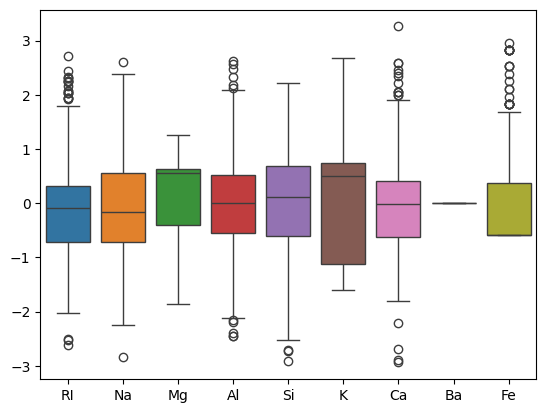

In [28]:
sns.boxplot(df_sc) # number and value of blowouts becomes lesser


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=21)

In [30]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


In [31]:
fin_score =[rfc.score(X_train,y_train), rfc.score(X_test, y_test)] # accuracy not very good
fin_score

[0.7602339181286549, 0.6511627906976745]

In [32]:
clean_report = classification_report(y_true =y_test, y_pred = y_pred)
print(clean_report)

              precision    recall  f1-score   support

           1       0.63      0.80      0.71        15
           2       0.61      0.69      0.65        16
           3       0.00      0.00      0.00         5
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         3

    accuracy                           0.65        43
   macro avg       0.67      0.64      0.62        43
weighted avg       0.59      0.65      0.60        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8. Сформулируем выводы по проделанной работе.

In [33]:
print(report) #before deleting

              precision    recall  f1-score   support

           1       0.63      0.80      0.71        15
           2       0.62      0.62      0.62        16
           3       0.00      0.00      0.00         5
           5       0.67      0.67      0.67         3
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         3

    accuracy                           0.65        43
   macro avg       0.57      0.68      0.61        43
weighted avg       0.58      0.65      0.61        43



In [34]:
print(clean_report)

              precision    recall  f1-score   support

           1       0.63      0.80      0.71        15
           2       0.61      0.69      0.65        16
           3       0.00      0.00      0.00         5
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         3

    accuracy                           0.65        43
   macro avg       0.67      0.64      0.62        43
weighted avg       0.59      0.65      0.60        43



In [35]:
print(f'init Score{init_score} finish score {fin_score}')

init Score[0.7660818713450293, 0.6511627906976745] finish score [0.7602339181286549, 0.6511627906976745]


В результате удаления выбросов видно, что точность модели изменилась слабо. Даже немного уменьшилась. Удаление выбросов может увеличить точность модели, а может меньшить в зависимости от того, что это за выбросы. Если это ошибки, или очень большие значения, то точность может увеличиться. В данном случае снижение точности может быть обусловлено тем, что были выкинуты нужные данные  т.к. речь идет о составе стекла. Это технические данные и добавление или удаление того или иного компонента может существенно повлиять на его марку.